In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers.merge import concatenate
from keras.utils import to_categorical 
import random

#Define normal and abnormal data
dataframe_ab = pd.read_csv('ptbdb_abnormal.csv', header=None, sep = ',')
dataframe_nor = pd.read_csv('ptbdb_normal.csv', header=None, sep = ',')

#Define array as a numpy array
dataframe_ab = np.array(dataframe_ab.values)
dataframe_nor = np.array(dataframe_nor.values)

#Remove Na from dataset
dataframe_ab = dataframe_ab[~np.isnan(dataframe_ab).any(axis=1)]
dataframe_nor = dataframe_nor[~np.isnan(dataframe_nor).any(axis=1)]

#Create test train split of each normal/abnormal dataset to ensure even split of class labels
ab_train, ab_test= train_test_split(dataframe_ab, test_size=0.3, random_state=21)
nor_train, nor_test = train_test_split(dataframe_nor,  test_size=0.3, random_state=21)

print(ab_train.shape)
print(nor_train.shape)
print(ab_test.shape)
print(nor_test.shape)

#Create a list of each labels

trainnor_labels = []
for i in nor_train:
  trainnor_labels.append(i[-1])

testnor_labels = []
for i in nor_test:
  testnor_labels.append(i[-1])

testab_labels = []
for i in ab_test:
  testab_labels.append(i[-1])

trainab_labels = []
for i in ab_train:
  trainab_labels.append(i[-1])

random.seed(123)
print(len(trainnor_labels))
print(len(testnor_labels))
print(len(testab_labels))
print(len(trainab_labels))


#Remove labels from test/train set
ab_train = np.delete(ab_train,-1, 1)
ab_test = np.delete(ab_test,-1, 1)
nor_train = np.delete(nor_train,-1, 1)
nor_test = np.delete(nor_test,-1, 1)
'''
arr = np.vstack((dataframe_ab, dataframe_nor))
arr = np.array(arr)

arr = arr[~np.isnan(arr).any(axis=1)]

labels = []
for i in arr:
  labels.append(i[-1])
print(labels)

arr = np.delete(arr,-1, 1)

x_train, x_test, train_labels, test_labels = train_test_split(arr, labels, test_size=0.3, random_state=21)

x_train = np.expand_dims(x_train, 2)
x_test = np.expand_dims(x_test, 2)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#train_labels = [int(item) for item in train_labels]
#test_labels = [int(item) for item in test_labels]
'''

#Compbine train/test data
x_train = np.vstack((ab_train, nor_train))
x_test = np.vstack((ab_test, nor_test))
train_labels = np.hstack((trainab_labels, trainnor_labels))
test_labels = np.hstack((testab_labels, testnor_labels))
x_train = np.expand_dims(x_train, 2)
x_test = np.expand_dims(x_test, 2)

#Set test train labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



(4685, 188)
(2832, 188)
(2008, 188)
(1214, 188)
2832
1214
2008
4685
ptb_train_X shape=(7517, 187, 1)
ptb_train_y shape=(7517, 2)
ptb_testX shape=(3222, 187, 1)
ptb_testy shape=(3222, 2)


In [ ]:
#Define lstm model with data input shape and initialise with 64 neurons
#Final layer softmax for exclusive binary case for 2 neurons(calculates predicted probability of each label)

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(187,1)))
lstm_model.add(Dense(128, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(2, activation = 'softmax'))
lstm_model.summary()

#Redifne for SGD model
lstm_model_SGD = Sequential()
lstm_model_SGD.add(LSTM(64, input_shape=(187,1)))
lstm_model_SGD.add(Dense(128, activation = 'relu'))
lstm_model_SGD.add(Dropout(0.3))
lstm_model_SGD.add(Dense(2, activation = 'softmax'))
lstm_model_SGD.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 64)                16896     
____________________________

In [ ]:
#Compiles model for both adam and sgd optimiser

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mae'])
lstm_model_SGD.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy', 'mae'])



In [ ]:
lstm_model_history = lstm_model.fit(x_train, train_labels, epochs = 100, batch_size = 100, validation_data = (x_test, test_labels))


Epoch 1/100
102/102 [==============================] - 19s 167ms/step - loss: 0.6193 - accuracy: 0.7024 - mae: 0.4318 - val_loss: 0.5910 - val_accuracy: 0.7219 - val_mae: 0.3980
Epoch 2/100
102/102 [==============================] - 16s 162ms/step - loss: 0.5976 - accuracy: 0.7181 - mae: 0.4075 - val_loss: 0.5908 - val_accuracy: 0.7219 - val_mae: 0.3984
Epoch 3/100
102/102 [==============================] - 17s 162ms/step - loss: 0.5861 - accuracy: 0.7189 - mae: 0.3965 - val_loss: 0.5501 - val_accuracy: 0.7219 - val_mae: 0.3400
Epoch 4/100
102/102 [==============================] - 16s 162ms/step - loss: 0.5512 - accuracy: 0.7188 - mae: 0.3655 - val_loss: 0.5196 - val_accuracy: 0.7224 - val_mae: 0.3146
Epoch 5/100
 36/102 [=========>....................] - ETA: 9s - loss: 0.5231 - accuracy: 0.7253 - mae: 0.3469

KeyboardInterrupt: ignored

In [ ]:
lstm_model_history_SGD = lstm_model_SGD.fit(x_train, train_labels, epochs = 100, batch_size = 100, validation_data = (x_test, test_labels))


Epoch 1/100
102/102 [==============================] - 20s 177ms/step - loss: 0.6581 - accuracy: 0.6995 - mae: 0.4789 - val_loss: 0.6035 - val_accuracy: 0.7219 - val_mae: 0.4342
Epoch 2/100
102/102 [==============================] - 17s 166ms/step - loss: 0.5999 - accuracy: 0.7194 - mae: 0.4274 - val_loss: 0.5925 - val_accuracy: 0.7219 - val_mae: 0.4123
Epoch 3/100
102/102 [==============================] - 18s 175ms/step - loss: 0.5872 - accuracy: 0.7281 - mae: 0.4072 - val_loss: 0.5913 - val_accuracy: 0.7219 - val_mae: 0.4052
Epoch 4/100
102/102 [==============================] - 18s 177ms/step - loss: 0.5877 - accuracy: 0.7261 - mae: 0.4021 - val_loss: 0.5912 - val_accuracy: 0.7219 - val_mae: 0.4039
Epoch 5/100
102/102 [==============================] - 17s 169ms/step - loss: 0.5895 - accuracy: 0.7243 - mae: 0.4024 - val_loss: 0.5911 - val_accuracy: 0.7219 - val_mae: 0.4026
Epoch 6/100
102/102 [==============================] - 18s 173ms/step - loss: 0.5993 - accuracy: 0.7132 - mae:

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
lstm_model_history_adam = lstm_model.fit(x_train, train_labels, epochs = 100, batch_size = 100, validation_data = (x_test, test_labels))


Text(0, 0.5, 'Accuracy')

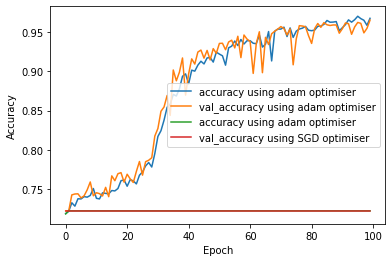

In [ ]:
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.plot(lstm_model_history_SGD.history['accuracy'])
plt.plot(lstm_model_history_SGD.history['val_accuracy'])
plt.legend(["accuracy using adam optimiser","val_accuracy using adam optimiser", "accuracy using adam optimiser", "val_accuracy using SGD optimiser"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0.5, 0, 'Number of epochs')

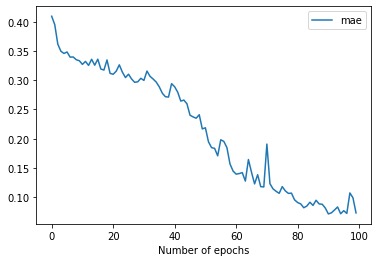

In [ ]:
plt.plot(lstm_model_history.history['mae'])

plt.legend(["mae","val_accuracy"])
plt.xlabel('Number of epochs')

Text(0, 0.5, 'Loss')

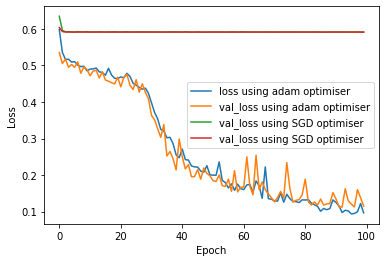

In [ ]:
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.plot(lstm_model_history_SGD.history['loss'])
plt.plot(lstm_model_history_SGD.history['val_loss'])
plt.legend(["loss using adam optimiser","val_loss using adam optimiser",'val_loss using SGD optimiser','val_loss using SGD optimiser'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

'              precision    recall  f1-score   support\n\n           0       0.10      0.11      0.10      1214\n           1       0.64      0.62      0.63      3152\n\n    accuracy                           0.47      4366\n   macro avg       0.37      0.36      0.36      4366\nweighted avg       0.49      0.47      0.48      4366\n'

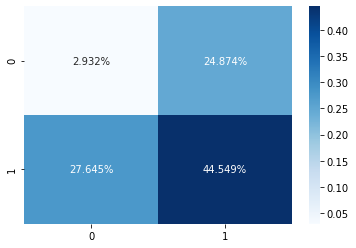

In [ ]:
from sklearn.metrics import classification_report
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=lstm_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)

lstm_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(lstm_model_cf_matrix/np.sum(lstm_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')

classification_report(y_true, prediction)

ResNet50

In [ ]:
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv1D(filters = F1, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(filters = F2, kernel_size = f, activation='relu', strides = 1, padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(filters = F3, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)
    X = BatchNormalization()(X)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

    

In [ ]:
  
def convolutional_block(X, f, filters, s = 2):
    F1, F2, F3 = filters
    
    X_shortcut = X

    X = Conv1D(F1, 1, activation='relu', strides = s)(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(F2, f, activation='relu', strides = 1,padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(F3, 1, strides = 1)(X)
    X = BatchNormalization()(X)

    X_shortcut = Conv1D(F3, 1, strides = s)(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [ ]:
def ResNet50(input_shape = (187,1)):
    
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)
    
    X = Conv1D(64, 7, activation='relu', strides = 2)(X)
    X = BatchNormalization()(X)
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)

    #Uses 3 sets of filters size 64 x 64 x 256
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])
    
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    
  #finding 
    '''
    
    X = AveragePooling2D(pool_size=2, strides=2, padding='same')(X)
    X = Flatten()(X)
    X = Dense(2, activation='softmax')(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    '''
    return model

def ResNet50_SGD(input_shape = (187,1)):
    
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)
    
    X = Conv1D(64, 7, activation='relu', strides = 2)(X)
    X = BatchNormalization()(X)
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)

    #Uses 3 sets of filters size 64 x 64 x 256
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])
    
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    
  #finding 
    '''
    
    X = AveragePooling2D(pool_size=2, strides=2, padding='same')(X)
    X = Flatten()(X)
    X = Dense(2, activation='softmax')(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    '''
    return model


In [ ]:
resNet50_model = ResNet50(input_shape = (187,1))
ResNet50_SGD = ResNet50_SGD(input_shape = (187,1))
resNet50_model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 193, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 94, 64)       512         zero_padding1d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 94, 64)       256         conv1d[0][0]                     
___________________________________________________________________________________________

In [ ]:
ResNet50_SGD.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
resNet50_model_history_SGD = ResNet50_SGD.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
85/85 [==============================] - 929s 11s/step - loss: 12.9295 - accuracy: 0.6164 - val_loss: 8626.2734 - val_accuracy: 0.6650
Epoch 2/10
85/85 [==============================] - 876s 10s/step - loss: 0.7179 - accuracy: 0.8211 - val_loss: 236.3241 - val_accuracy: 0.6647
Epoch 3/10
85/85 [==============================] - 863s 10s/step - loss: 0.4144 - accuracy: 0.8642 - val_loss: 15.0563 - val_accuracy: 0.6675
Epoch 4/10
85/85 [==============================] - 863s 10s/step - loss: 0.2394 - accuracy: 0.9163 - val_loss: 0.6204 - val_accuracy: 0.7296
Epoch 5/10
85/85 [==============================] - 839s 10s/step - loss: 0.1680 - accuracy: 0.9380 - val_loss: 0.6996 - val_accuracy: 0.7726
Epoch 6/10
85/85 [==============================] - 873s 10s/step - loss: 0.2007 - accuracy: 0.9365 - val_loss: 1.6987 - val_accuracy: 0.5549
Epoch 7/10
85/85 [==============================] - 857s 10s/step - loss: 0.1907 - accuracy: 0.9327 - val_loss: 0.1944 - val_accuracy: 0.9332

In [ ]:
resNet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resNet50_model_history = resNet50_model.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
85/85 [==============================] - 824s 10s/step - loss: 2.8401 - accuracy: 0.6464 - val_loss: 2.5778 - val_accuracy: 0.6650
Epoch 2/10
85/85 [==============================] - 795s 9s/step - loss: 0.5743 - accuracy: 0.8299 - val_loss: 2.6780 - val_accuracy: 0.6650
Epoch 3/10
85/85 [==============================] - 779s 9s/step - loss: 0.2845 - accuracy: 0.9085 - val_loss: 6.4475 - val_accuracy: 0.6650
Epoch 4/10
85/85 [==============================] - 807s 9s/step - loss: 0.1637 - accuracy: 0.9449 - val_loss: 3.2983 - val_accuracy: 0.6650
Epoch 5/10
85/85 [==============================] - 784s 9s/step - loss: 0.0895 - accuracy: 0.9668 - val_loss: 4.4626 - val_accuracy: 0.6589
Epoch 6/10
85/85 [==============================] - 783s 9s/step - loss: 0.1497 - accuracy: 0.9527 - val_loss: 1.3915 - val_accuracy: 0.7114
Epoch 7/10
85/85 [==============================] - 802s 9s/step - loss: 0.0723 - accuracy: 0.9723 - val_loss: 1.0505 - val_accuracy: 0.7387
Epoch 8/10
8

Text(0, 0.5, 'Accuracy')

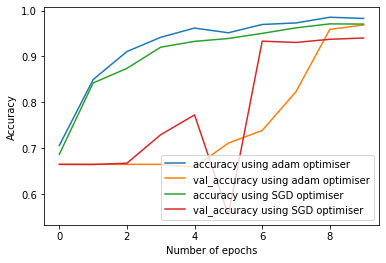

In [ ]:
plt.plot(resNet50_model_history.history['accuracy'])
plt.plot(resNet50_model_history.history['val_accuracy'])
plt.plot(resNet50_model_history_SGD.history['accuracy'])
plt.plot(resNet50_model_history_SGD.history['val_accuracy'])
plt.legend(["accuracy using adam optimiser","val_accuracy using adam optimiser","accuracy using SGD optimiser","val_accuracy using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

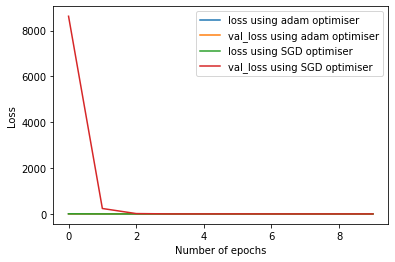

In [ ]:
plt.plot(resNet50_model_history.history['loss'])
plt.plot(resNet50_model_history.history['val_loss'])
plt.plot(resNet50_model_history_SGD.history['loss'])
plt.plot(resNet50_model_history_SGD.history['val_loss'])
plt.legend(["loss using adam optimiser","val_loss using adam optimiser","loss using SGD optimiser","val_loss using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [ ]:
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=resNet50_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)

prediction_proba_sgd=ResNet50_SGD.predict(x_test)
prediction_sgd=np.argmax(prediction_proba_sgd,axis=1)
print(prediction)

[1 1 1 ... 0 0 0]


'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91      1214\n           1       0.96      0.95      0.95      2410\n\n    accuracy                           0.94      3624\n   macro avg       0.93      0.94      0.93      3624\nweighted avg       0.94      0.94      0.94      3624\n'

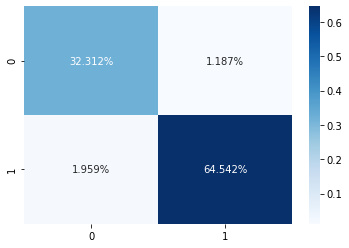

In [ ]:
from sklearn.metrics import classification_report
resNet50_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(resNet50_model_cf_matrix/np.sum(resNet50_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')
classification_report(y_true, prediction)
classification_report(y_true, prediction_sgd)

In [ ]:
def inception_block(prev_layer):
    
    conv1=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    
    conv3=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    conv3=Conv1D(filters = 64, kernel_size = 3, activation='relu', padding = 'same')(conv3)
    
    conv5=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(prev_layer)
    conv5=Conv1D(filters = 64, kernel_size = 5, activation='relu', padding = 'same')(conv5)
    
    pool= MaxPool1D(pool_size=3, strides=1, padding='same')(prev_layer)
    convmax=Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(pool)
    
    layer_out = concatenate([conv1, conv3, conv5, convmax], axis=1)
    return layer_out

In [ ]:
def inception_model(input_shape):
    X_input=Input(input_shape)
    
    X = Conv1D(filters = 64, kernel_size = 7, activation='relu', padding = 'same')(X_input)
    X = MaxPool1D(pool_size=3, strides=2, padding='same')(X)
    
    X = Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(X)
    
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    
    X = MaxPool1D(pool_size=7, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Inception')
    
    return model

def inception_modelSDG(input_shape):
    X_input=Input(input_shape)
    
    X = Conv1D(filters = 64, kernel_size = 7, activation='relu', padding = 'same')(X_input)
    X = MaxPool1D(pool_size=3, strides=2, padding='same')(X)
    
    X = Conv1D(filters = 64, kernel_size = 1, activation='relu', padding = 'same')(X)
    
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    X = inception_block(X)
    
    X = MaxPool1D(pool_size=7, strides=2, padding='same')(X)
    
    X = Flatten()(X)
    X = Dense(2,activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Inception')
    
    return model

In [ ]:
inception_model = inception_model(input_shape = (187,1))
inception_modelSDG = inception_modelSDG(input_shape = (187,1))
inception_model.summary()

Model: "Inception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 187, 64)      512         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 94, 64)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 94, 64)       4160        max_pooling1d[0][0]              
__________________________________________________________________________________________

In [ ]:
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
inception_model_history = inception_model.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
76/76 [==============================] - 784s 10s/step - loss: 0.5811 - accuracy: 0.6960 - val_loss: 0.3967 - val_accuracy: 0.8333
Epoch 2/10
76/76 [==============================] - 786s 10s/step - loss: 0.3927 - accuracy: 0.8284 - val_loss: 0.3046 - val_accuracy: 0.8802
Epoch 3/10
76/76 [==============================] - 815s 11s/step - loss: 0.2883 - accuracy: 0.8783 - val_loss: 0.2298 - val_accuracy: 0.8991
Epoch 4/10
76/76 [==============================] - 810s 11s/step - loss: 0.2201 - accuracy: 0.9142 - val_loss: 0.1908 - val_accuracy: 0.9395
Epoch 5/10
76/76 [==============================] - 810s 11s/step - loss: 0.1777 - accuracy: 0.9344 - val_loss: 0.1788 - val_accuracy: 0.9336
Epoch 6/10
76/76 [==============================] - 819s 11s/step - loss: 0.1454 - accuracy: 0.9434 - val_loss: 0.1175 - val_accuracy: 0.9631
Epoch 7/10
76/76 [==============================] - 795s 10s/step - loss: 0.0888 - accuracy: 0.9697 - val_loss: 0.1838 - val_accuracy: 0.9376
Epoch 

In [ ]:
inception_modelSDG.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
inception_modelSDG_history = inception_modelSDG.fit(x_train, train_labels, epochs = 10, batch_size = 100, validation_data = (x_test, test_labels))

Epoch 1/10
76/76 [==============================] - 808s 11s/step - loss: 0.6522 - accuracy: 0.6208 - val_loss: 0.6010 - val_accuracy: 0.6750
Epoch 2/10
76/76 [==============================] - 841s 11s/step - loss: 0.5938 - accuracy: 0.6727 - val_loss: 0.5643 - val_accuracy: 0.7089
Epoch 3/10
76/76 [==============================] - 828s 11s/step - loss: 0.5680 - accuracy: 0.7000 - val_loss: 0.5439 - val_accuracy: 0.7194
Epoch 4/10
76/76 [==============================] - 815s 11s/step - loss: 0.5476 - accuracy: 0.7244 - val_loss: 0.5266 - val_accuracy: 0.7312
Epoch 5/10
76/76 [==============================] - 811s 11s/step - loss: 0.5260 - accuracy: 0.7441 - val_loss: 0.5080 - val_accuracy: 0.7548
Epoch 6/10
76/76 [==============================] - 813s 11s/step - loss: 0.5044 - accuracy: 0.7586 - val_loss: 0.4894 - val_accuracy: 0.7716
Epoch 7/10
76/76 [==============================] - 833s 11s/step - loss: 0.4943 - accuracy: 0.7693 - val_loss: 0.4721 - val_accuracy: 0.7784
Epoch 

Text(0, 0.5, 'Accuracy')

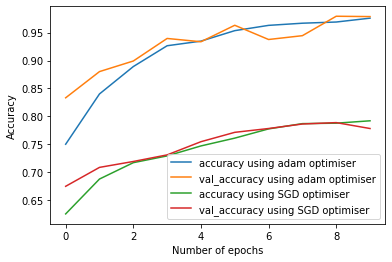

In [ ]:
plt.plot(inception_model_history.history['accuracy'])
plt.plot(inception_model_history.history['val_accuracy'])
plt.plot(inception_modelSDG_history.history['accuracy'])
plt.plot(inception_modelSDG_history.history['val_accuracy'])
plt.legend(["accuracy using adam optimiser","val_accuracy using adam optimiser","accuracy using SGD optimiser","val_accuracy using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

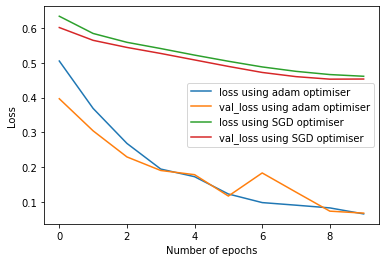

In [ ]:

plt.plot(inception_model_history.history['loss'])
plt.plot(inception_model_history.history['val_loss'])
plt.plot(inception_modelSDG_history.history['loss'])
plt.plot(inception_modelSDG_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.legend(["loss using adam optimiser","val_loss using adam optimiser","loss using SGD optimiser","val_loss using SGD optimiser"])
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [ ]:
y_true=[]
for element in test_labels:
    y_true.append(np.argmax(element))
prediction_proba=inception_model.predict(x_test)
prediction=np.argmax(prediction_proba,axis=1)
prediction_proba=inception_modelSDG.predict(x_test)
prediction_SGD=np.argmax(prediction_proba,axis=1)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97      1214\n           1       0.99      0.98      0.98      2008\n\n    accuracy                           0.98      3222\n   macro avg       0.98      0.98      0.98      3222\nweighted avg       0.98      0.98      0.98      3222\n'

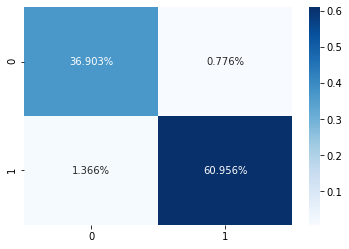

In [ ]:
from sklearn.metrics import classification_report
inception_model_cf_matrix = confusion_matrix(y_true, prediction)
sns.heatmap(inception_model_cf_matrix/np.sum(inception_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')
classification_report(y_true, prediction)
#classification_report(y_true, prediction_SGD)